# 3D scan feature detection
### Patrick Ruan
#### pat.wruan@gmail.com
------

### Read data from CSV file using pandas

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('point-cloud.csv',header=None)
scanned_data=np.asarray(df)
scanned_data

array([[-99.9999, -99.9999, -99.9999, ..., -99.9999, -99.9999, -99.9999],
       [-99.9999, -99.9999, -99.9999, ..., -99.9999, -99.9999, -99.9999],
       [-99.9999, -99.9999, -99.9999, ..., -99.9999, -99.9999, -99.9999],
       ...,
       [-99.9999, -99.9999, -99.9999, ..., -99.9999, -99.9999, -99.9999],
       [-99.9999, -99.9999, -99.9999, ..., -99.9999, -99.9999, -99.9999],
       [-99.9999, -99.9999, -99.9999, ..., -99.9999, -99.9999, -99.9999]])

### A. Given the scan file visualize the raw data in a 3D graph.

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

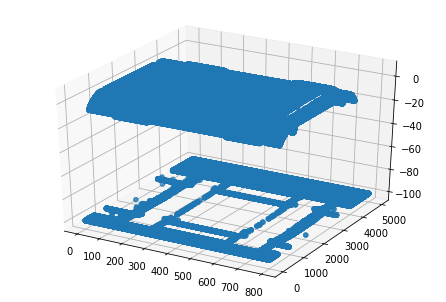

In [3]:
X,Y=np.meshgrid(np.arange(0,scanned_data.shape[1],1),np.arange(0,scanned_data.shape[0],1)) 
fig = plt.figure()
ax = Axes3D(fig)
ax=fig.gca(projection='3d')
ax.scatter(X,Y,scanned_data)
plt.show()

The figure above shows distribution of the data from CSV file. Looks like the values less than -30, especially the value "-99.9999", could be ignored.  

In [4]:
def plot_3d(data):
    shape=data.shape
    Y=np.arange(0,shape[0],1)
    X=np.arange(0,shape[1],1)
    X,Y=np.meshgrid(X,Y) 
    fig = plt.figure()
    ax = Axes3D(fig)
    ax=fig.gca(projection='3d')
    ax.set_zlim3d(-30,10) # Limitation of axis-z
    ax.scatter(X,Y,data)
    plt.show()

#### Answer:

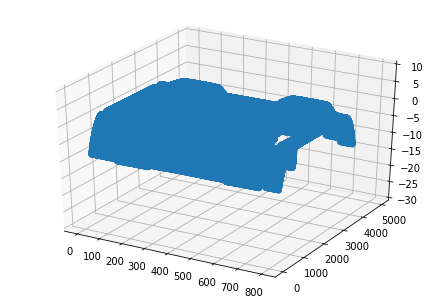

In [149]:
plot_3d(scanned_data)

-----

### B. Automatically detect the separate sections of the scan and visualize them in separate 3D graphs.

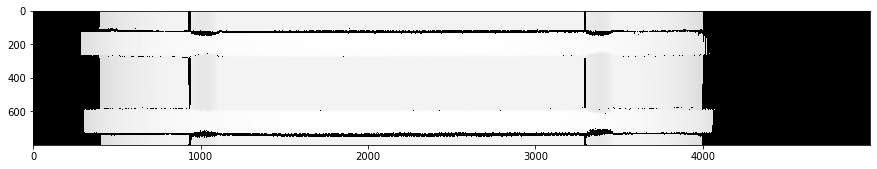

In [6]:
thred=-99
vis_data=np.zeros(scanned_data.shape)
temp_data=scanned_data+(np.max(scanned_data)-np.min(scanned_data))
vis_data=temp_data/np.max(temp_data)*255
# for i in range(scanned_data.shape[0]):
#     for j in range(scanned_data.shape[1]):
#         if scanned_data[i][j]>thred:
#             vis_data[i][j]=1
#         else:
#             vis_data[i][j]=0
plt.figure(figsize=(15,10))
plt.imshow(vis_data.transpose(),cmap ='gray')

In [5]:
def get_boundary(segments,margin):
    boundary=[]
    mar=margin
    for i in range(len(segments)-1):
        if mar==True:
            mar=False
        else:
            boundary.append((segments[i]+segments[i+1])//2)
            mar=True
    boundary.append(0)
    boundary.append(800)
    return sorted(boundary)

def vector_segmentor(vector,thred):
    segments=[]
    segments.append(0)
    for i in range(vector.size):
        if vector[i]<thred:
            vector[i]=0
        else:
            vector[i]=1
    for i in range(vector.size-1):
        if vector[i]!=vector[i+1]:
            segments.append(i+1)
    segments.append(800)
    return get_boundary(segments,margin=True)

In [6]:
boundary=vector_segmentor(np.sum(scanned_data,axis=0),-30*5000)
boundary

[0, 120, 271, 580, 739, 800]

In [7]:
def segmentor(data):
    sections={}
    boundary=vector_segmentor(np.sum(data,axis=0),-30*5000)
    for i in range(len(boundary)-1):
        sections[i]=scanned_data[:,boundary[i]:boundary[i+1]]
    return sections

In [8]:
original_data_sections=segmentor(scanned_data)
original_data_sections

{0: array([[-99.9999, -99.9999, -99.9999, ..., -99.9999, -99.9999, -99.9999],
        [-99.9999, -99.9999, -99.9999, ..., -99.9999, -99.9999, -99.9999],
        [-99.9999, -99.9999, -99.9999, ..., -99.9999, -99.9999, -99.9999],
        ...,
        [-99.9999, -99.9999, -99.9999, ..., -99.9999, -99.9999, -99.9999],
        [-99.9999, -99.9999, -99.9999, ..., -99.9999, -99.9999, -99.9999],
        [-99.9999, -99.9999, -99.9999, ..., -99.9999, -99.9999, -99.9999]]),
 1: array([[-99.9999, -99.9999, -99.9999, ..., -99.9999, -99.9999, -99.9999],
        [-99.9999, -99.9999, -99.9999, ..., -99.9999, -99.9999, -99.9999],
        [-99.9999, -99.9999, -99.9999, ..., -99.9999, -99.9999, -99.9999],
        ...,
        [-99.9999, -99.9999, -99.9999, ..., -99.9999, -99.9999, -99.9999],
        [-99.9999, -99.9999, -99.9999, ..., -99.9999, -99.9999, -99.9999],
        [-99.9999, -99.9999, -99.9999, ..., -99.9999, -99.9999, -99.9999]]),
 2: array([[-99.9999, -99.9999, -99.9999, ..., -99.9999, -99.999

#### Answer:

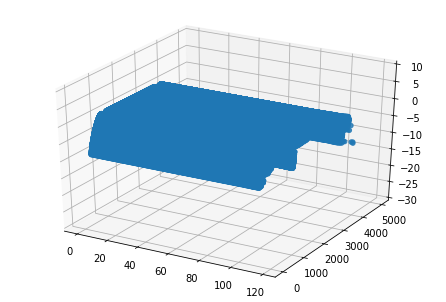

In [19]:
plot_3d(original_data_sections[0]) # The first section

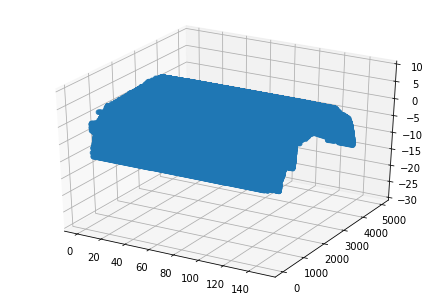

In [20]:
plot_3d(original_data_sections[1]) #The second section

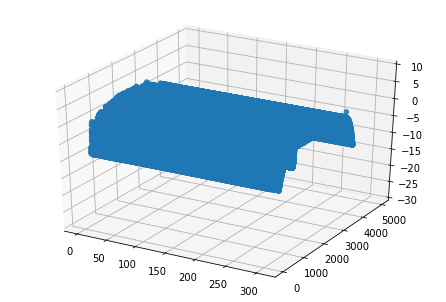

In [21]:
plot_3d(original_data_sections[2]) #The third section

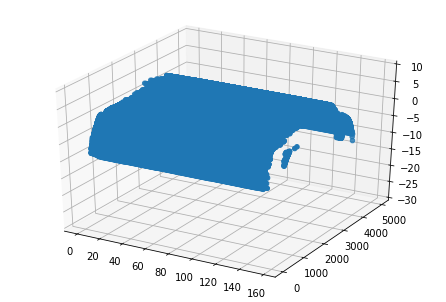

In [22]:
plot_3d(original_data_sections[3]) #The fourth section

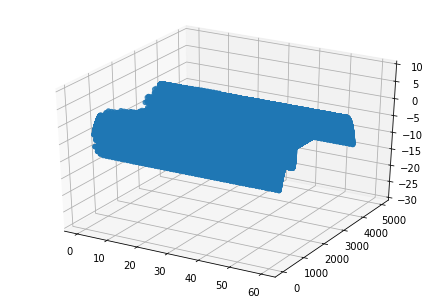

In [23]:
plot_3d(original_data_sections[4]) #The fifth section

-------

### C. Plot of the face of each section in a 2D graph.

In [9]:
def plotface(data,title):
    shape=data.shape
    Y=np.arange(0,shape[0],1)
    X=np.arange(0,shape[1],1)
    plt.figure(figsize=(10,3))
    fig=plt.subplot(1, 1, 1)
    fig.set_title(title)
    for i in range(data.shape[1]):
        plt.scatter(Y,data[:,i],color='red')
    plt.ylim(-25, 10)
    
#     plt.subplot(1, 2, 2)
#     for j in range (data.shape[0]):
#         plt.scatter(X,data[j,:],color='red')
#     plt.ylim(-25,10)
    
    plt.show()

#### Answer:
##### Projection in the x-axis direction of each section.

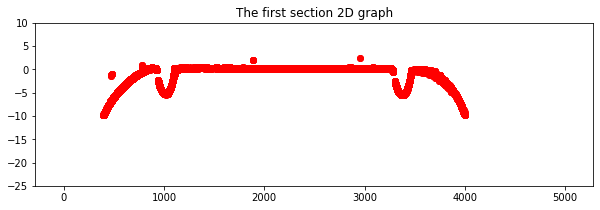

In [10]:
plotface(original_data_sections[0],"The first section 2D graph") # The first section

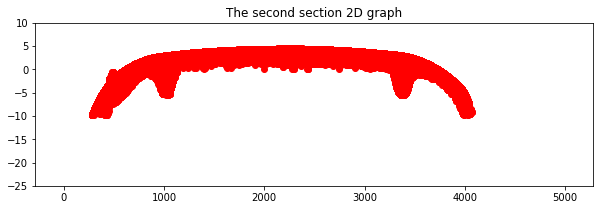

In [47]:
plotface(original_data_sections[1],"The second section 2D graph") # The second section

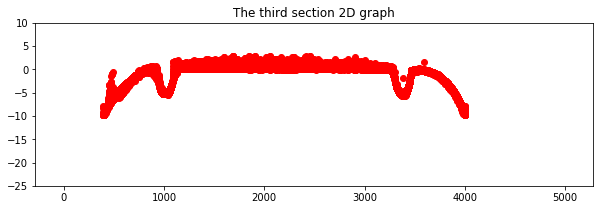

In [48]:
plotface(original_data_sections[2],"The third section 2D graph") # The third section

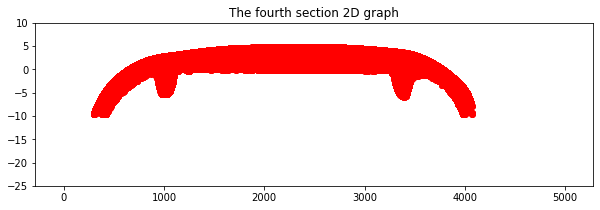

In [49]:
plotface(original_data_sections[3],"The fourth section 2D graph") # The fourth section

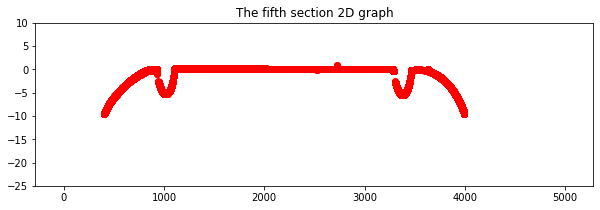

In [50]:
plotface(original_data_sections[4],"The fifth section 2D graph") # The fifth section

------------

### D. Clean up the noise on each section so the 2D graphs are smoother.

Like cleaning up the noise for images, I attempted some famous algorithms for this test.

#### D.1 Mean filtering

In [11]:
def mean_filter(data,mask_size):
    x_size=data.shape[0]
    y_size=data.shape[1]
    result_data=np.zeros((x_size,y_size))
    pad_data = np.full((x_size+mask_size-1,y_size+mask_size-1),-99.9999)
    pad_data[:x_size,:y_size]=data
    for i in range(x_size):
        for j in range(y_size):
            sum=0
            for x in range(mask_size):
                for y in range(mask_size):
                    sum=sum+pad_data[i+x][j+y]
            result_data[i][j]=sum/(mask_size*mask_size)
    
    return result_data

In [12]:
mean_filtered_data=mean_filter(scanned_data,5)
mean_data_sections=segmentor(mean_filtered_data)

#### D.2 Median filtering

In [13]:
def median_filter(data,mask_size):
    x_size=data.shape[0]
    y_size=data.shape[1]
    result_data=np.zeros((x_size,y_size))
    pad_data = np.full((x_size+mask_size-1,y_size+mask_size-1),-99.9999)
    pad_data[:x_size,:y_size]=data
    for i in range(x_size):
        for j in range(y_size):
            mask_list=[]
            for x in range(mask_size):
                for y in range(mask_size):
                    mask_list.append(pad_data[i+x][j+y])

            result_data[i][j]=sorted(mask_list)[(mask_size*mask_size)//2]
    
    return result_data

In [14]:
median_filtered_data=median_filter(scanned_data,5)
median_data_sections=segmentor(median_filtered_data)

In [15]:
def compare(datas,titles):
    plt.figure(figsize=(15,3))
    for i in range(len(datas)):
        shape=datas[i].shape
        Y=np.arange(0,shape[0],1)
        fig=plt.subplot(1,len(datas),i+1)
        fig.set_title(titles[i])
        for j in range(shape[1]):
            plt.scatter(Y,datas[i][:,j],color='red')
        plt.ylim(-25,10)
        
    plt.show()

#### Answer:

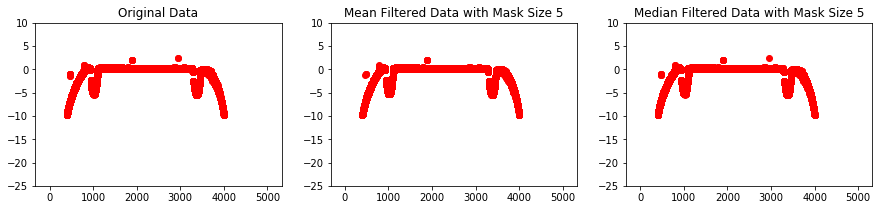

In [21]:
titles=['Original Data','Mean Filtered Data with Mask Size 5','Median Filtered Data with Mask Size 5']
compare([original_data_sections[0],mean_data_sections[0],median_data_sections[0]],titles) #The first section

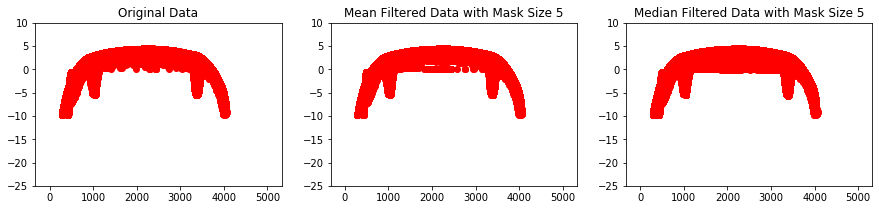

In [99]:
compare([original_data_sections[1],mean_data_sections[1],median_data_sections[1]],titles) #The second section

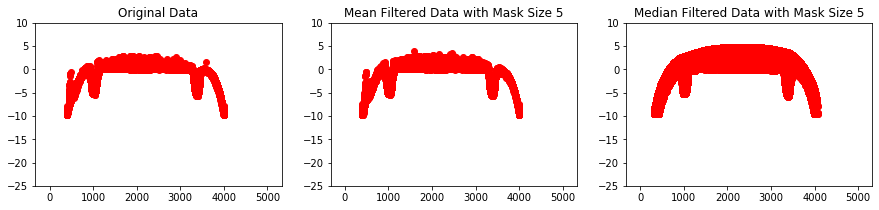

In [100]:
compare([original_data_sections[2],mean_data_sections[2],median_data_sections[2]],titles) #The third section

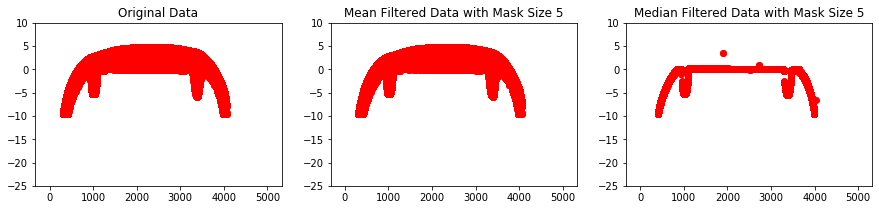

In [101]:
compare([original_data_sections[3],mean_data_sections[3],median_data_sections[3]],titles) #The fourth section

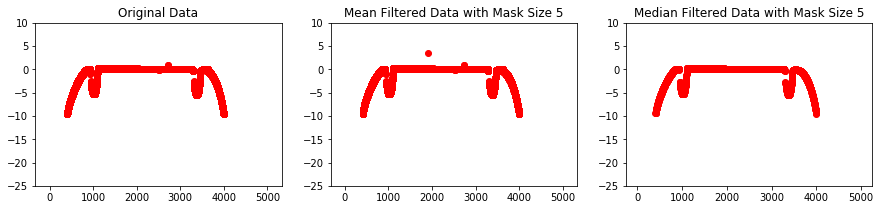

In [102]:
compare([original_data_sections[4],mean_data_sections[4],median_data_sections[4]],titles) #The fifth section

-----------

### E. 3 of the 5 sections have some dimples inset into the shape. Detect the radius of these dimples.

From the figures above, it could be clear to see that section 1, section 3 and section 5 have dimples insert into the shape.

#### e.1 My idea of caculating the radius of dimples
![alt text](radius.jpg)

In [16]:
def cal_radius(A,C,thred):
    y=C[1]+thred
    last_dis_diff=np.sqrt(np.sum(np.square(np.asarray(A-C))))
#     print(last_dis_diff)
    while True:
        AO=np.sqrt(np.sum(np.square(np.asarray([C[0],y])-A)))
#         print(AO)
        CO=np.sqrt(np.sum(np.square(np.asarray([C[0],y])-C)))
#         print(CO)
        dis_diff=abs(CO-AO)
#         print(dis_diff)
        if(dis_diff<last_dis_diff):
            y=y+thred
        else:
            break
        last_dis_diff=dis_diff
        
    return y-C[1]

In [44]:
#Example:
cal_radius(np.asarray([0,2]),np.asarray([3,0]),0.01)

3.2599999999999745

#### e.2 Find the index range of dimples of each section.

Use the median value of each row to deal with this problem.

In [17]:
def vis_data(data,thred):
    result=np.zeros((data.shape[0]))
    for i in range(data.shape[0]):
        data_list=[]
        for j in range(data.shape[1]):
            if data[i][j]>thred:
                data_list.append(data[i][j])
        if data_list!=[]:
            result[i]=data_list[len(data_list)//2]
    
    return result

In [18]:
## I have also attempted to use mean value of each row, but it seems median value performs better! 

def vis_data_mean(data,thred):
    result=np.zeros((data.shape[0]))
    for i in range(data.shape[0]):
        sum=0
        index=0
        for j in range(data.shape[1]):
            if data[i][j]>thred:
                sum+=data[i][j]
                index=index+1
        if index!=0:
            result[i]=sum/index
    
    return result

In [19]:
def lets_see(data,p,title):
    Y=np.arange(0,data.shape[0],1)
    plt.figure(figsize=(10,3))
    fig=plt.subplot(1, 1, 1)
    fig.set_title(title)
    for i in range(data.shape[1]):
        plt.scatter(Y,data[:,i],color='red')  
    plt.ylim(-15, 10)
    for i in p:
        plt.plot(Y,i,color='b')
    plt.show()

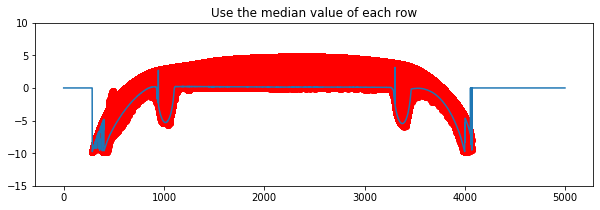

In [36]:
lets_see(scanned_data,[vis_data(scanned_data,-30)],"Use the median value of each row")

##### Section 1:

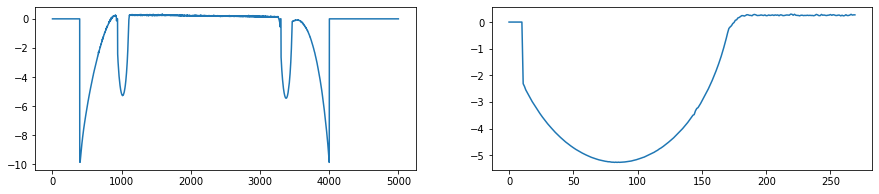

In [22]:
plt.figure(figsize=(15,3))
t=vis_data(original_data_sections[0],-30)  
Y=np.arange(0,5000,1)
plt.subplot(1,2,1)
plt.plot(Y,t)

section1_dimple_range=t[930:1200]
plt.subplot(1,2,2)
plt.plot(np.arange(0,section1_dimple_range.shape[0],1),section1_dimple_range)

##### Section 3:

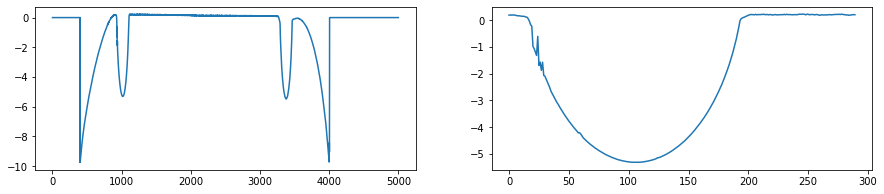

In [23]:
plt.figure(figsize=(15,3))
t=vis_data(original_data_sections[2],-30)  
Y=np.arange(0,5000,1)
plt.subplot(1,2,1)
plt.plot(Y,t)

section3_dimple_range=t[910:1200]
plt.subplot(1,2,2)
plt.plot(np.arange(0,section3_dimple_range.shape[0],1),section3_dimple_range)

##### Section 5:

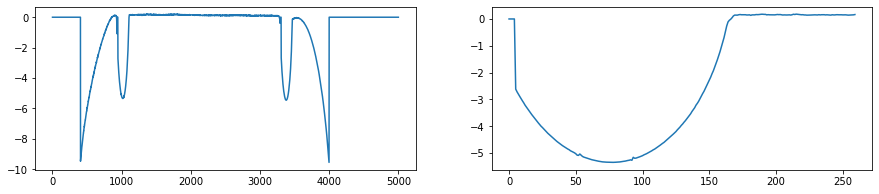

In [24]:
plt.figure(figsize=(15,3))
t=vis_data(original_data_sections[4],-30)  
Y=np.arange(0,5000,1)
plt.subplot(1,2,1)
plt.plot(Y,t)

section5_dimple_range=t[940:1200]
plt.subplot(1,2,2)
plt.plot(np.arange(0,section5_dimple_range.shape[0],1),section5_dimple_range)

#### e.3 Find the coordinates of local minima point and edge point.

In [25]:
def find_local_minima(vector):
    local_minima=np.min(vector)
    local_minima_index=(np.where(vector==local_minima)[0][0]+np.where(vector==local_minima)[0][-1])//2
    edge=0
    edge_index=0
    for i in range(vector.size-1):
        if vector[i]>vector[i+1]:
            edge_index=i
            edge=vector[i]
            break
        
    return np.asarray([edge_index,edge]),np.asarray([local_minima_index,local_minima])

In [26]:
section_1s=find_local_minima(section1_dimple_range)
section_3s=find_local_minima(section3_dimple_range)
section_5s=find_local_minima(section5_dimple_range)

#### e.4 Calculating radius & Answer
##### PS: Assume the two dimples of each sections have the same radius. The radius is calculated based on one of the dimples. 

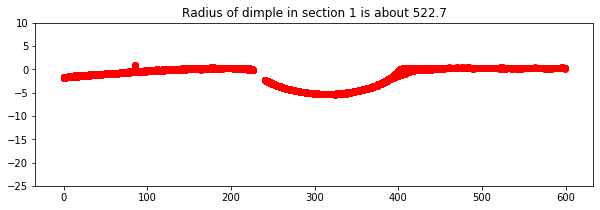

522.700000000049


In [27]:
section1_radius=cal_radius(section_1s[0],section_1s[1],0.1)
plotface(original_data_sections[0][700:1300,:],"Radius of dimple in section 1 is about "+ str(round(section1_radius,3)))
print(section1_radius)

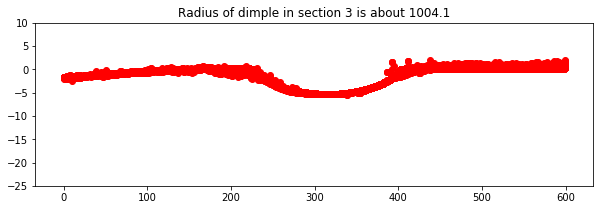

1004.1000000001586


In [28]:
section3_radius=cal_radius(section_3s[0],section_3s[1],0.1)
plotface(original_data_sections[2][700:1300,:],"Radius of dimple in section 3 is about "+ str(round(section3_radius,3)))
print(section3_radius)

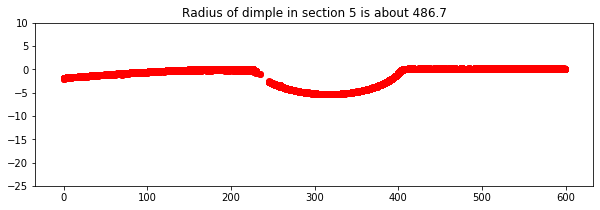

486.700000000041


In [29]:
section5_radius=cal_radius(section_5s[0],section_5s[1],0.1)
plotface(original_data_sections[4][700:1300,:],"Radius of dimple in section 5 is about "+ str(round(section5_radius,3)))
print(section5_radius)

--------------

### F. Extrapolate the 2D graphs to extend an extra 1000 points farther than their current start and end.

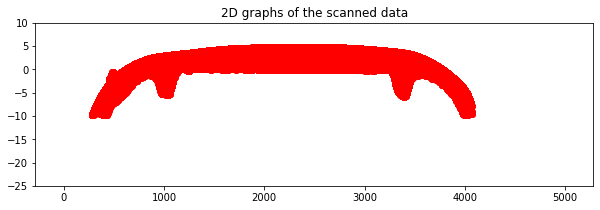

In [90]:
plotface(scanned_data,"2D graphs of the scanned data")

#### My idea of extrapolation

From the 2D graph above, it could be predicted that both ends of the shape would continue to extend downward. Calculate the slope of the data and predict the extrapolated data.

In [30]:
def vis_max_min(data,thred,m):
    result=np.zeros((data.shape[0]))
    for i in range(data.shape[0]):
        data_list=[]
        for j in range(data.shape[1]):
            if data[i][j]>thred:
                data_list.append(data[i][j])
        if data_list!=[]:
            if m=="max":
                result[i]=max(data_list)
            elif m=="min":
                result[i]=min(data_list)
            else:
                print ("ERROR!")
                return 0
    
    return result

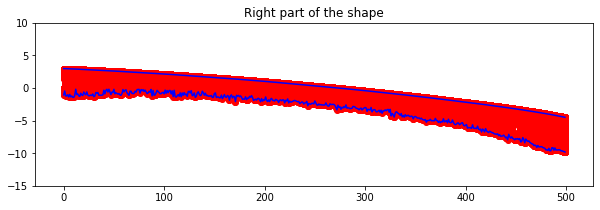

In [41]:
part_data_right=scanned_data[3500:4000,:]
p_max_right=vis_max_min(part_data_right,-30,"max")
p_min_right=vis_max_min(part_data_right,-30,"min")
p_right=[p_max_right,p_min_right]
lets_see(part_data_right,p_right,"Right part of the shape")

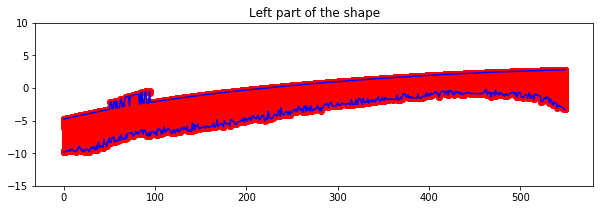

In [32]:
part_data_left=scanned_data[400:950,:]
p_max_left=vis_max_min(part_data_left,-30,"max")
p_min_left=vis_max_min(part_data_left,-30,"min")
p_left=[p_max_left,p_min_left]
lets_see(part_data_left,p_left,"Left part of the shape")

#### F.1 Linear Regression

##### F.1.1 Right side

In [37]:
def linearR(x,y):
    X = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(X, y, rcond=None)[0]
    return m,c

In [88]:
def showboth(x,p):
    y_max=p[0]
    y_min=p[1]
    m_max, c_max = linearR(x,y_max)
    m_min, c_min = linearR(x,y_min)
    plt.plot(x, m_max*x + c_max, x, m_min*x + c_min, 'b')
    plt.plot(x,p[0],x,p[1],color='r')
    return [[m_max,c_max],[m_min,c_min]]

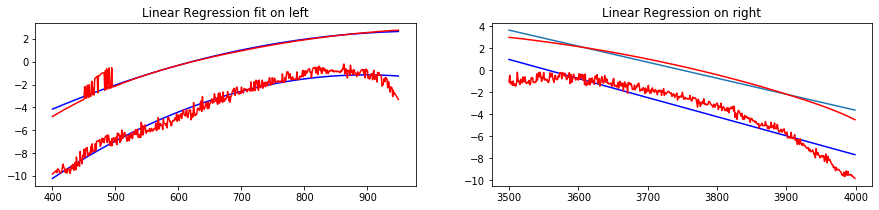

In [94]:
plt.figure(figsize=(15,3))

x_left = np.asarray([i for i in range(400,950)])
m_left_max, c_left_max = linearR(x_left,p_left[0])
m_left_min, c_left_min = linearR(x_left,p_left[1])
fig=plt.subplot(1,2,1)
fig.set_title("Linear Regression fit on left")
p2_left_max=np.poly1d(np.polyfit(x_left,p_max_left,2))
p2_left_min=np.poly1d(np.polyfit(x_left,p_min_left,2))
plt.plot(x_left, p2_left_max(x_left),x_left,p2_left_min(x_left),color='b')
plt.plot(x_left, p_max_left,x_left,p_min_left,color='r')

x_right = np.asarray([i for i in range(3500,4000)])
m_right_max, c_right_max = linearR(x_right,p_right[0])
m_right_min, c_right_min = linearR(x_right,p_right[1])
fig=plt.subplot(1,2,2)
fig.set_title("Linear Regression on right")
plt.plot(x_right, m_right_max*x_right + c_right_max, x_right, m_right_min*x_right + c_right_min, 'b')
plt.plot(x_right, p_right[0],x_right,p_right[1],color='r')

##### F.1.3 Extrapolation

In [62]:
def extrapolate_lr(old_data,ran,mc):
    new_data=np.zeros((old_data.shape[0]+2*ran,old_data.shape[1]))
    new_data[ran:ran+old_data.shape[0],:]=old_data
    for j in range(ran):
        new_data[j][:]=np.random.uniform(mc[0][1][0]*j+mc[0][1][1],mc[0][0][0]*j+mc[0][0][1],size=(1,new_data.shape[1]))
    for j in range(old_data.shape[0]+ran,old_data.shape[0]+2*ran):
        new_data[j][:]=np.random.uniform(mc[1][1][0]*j+mc[1][1][1],mc[1][0][0]*j+mc[1][0][1],size=(1,new_data.shape[1]))
    return new_data

In [87]:
mc=[mc_left,mc_right]
new_data_lr=extrapolate_lr(scanned_data[400:4000,:],500,mc)

#### F.2  Polynomial Fit

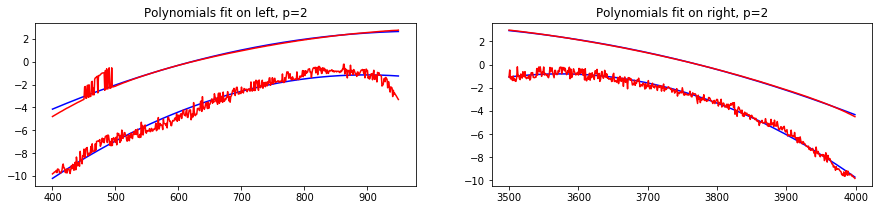

In [75]:
plt.figure(figsize=(15,3))
fig=plt.subplot(1,2,1)
fig.set_title("Polynomials fit on left, p=2")
p2_left_max=np.poly1d(np.polyfit(x_left,p_max_left,2))
p2_left_min=np.poly1d(np.polyfit(x_left,p_min_left,2))
plt.plot(x_left, p2_left_max(x_left),x_left,p2_left_min(x_left),color='b')
plt.plot(x_left, p_max_left,x_left,p_min_left,color='r')

fig=plt.subplot(1,2,2)
fig.set_title("Polynomials fit on right, p=2")
p2_right_max=np.poly1d(np.polyfit(x_right,p_max_right,2))
p2_right_min=np.poly1d(np.polyfit(x_right,p_min_right,2))
plt.plot(x_right, p2_right_max(x_right),x_right,p2_right_min(x_right),color='b')
plt.plot(x_right, p_max_right,x_right,p_min_right,color='r')

In [80]:
def extrapolate_poly(old_data,ran,p2):
    new_data=np.zeros((old_data.shape[0]+2*ran,old_data.shape[1]))
    new_data[ran:ran+old_data.shape[0],:]=old_data
    for j in range(ran):
        new_data[j][:]=np.random.uniform(p2[0][1](j),p2[0][0](j),size=(1,new_data.shape[1]))
    for j in range(old_data.shape[0]+ran,old_data.shape[0]+2*ran):
        new_data[j][:]=np.random.uniform(p2[1][1](j),p2[1][0](j),size=(1,new_data.shape[1]))
    return new_data

In [81]:
p2=[[p2_left_max,p2_left_min],[p2_right_max,p2_right_min]]
new_data_poly=extrapolate_poly(scanned_data[400:4000,:],500,p2)

#### Answer:

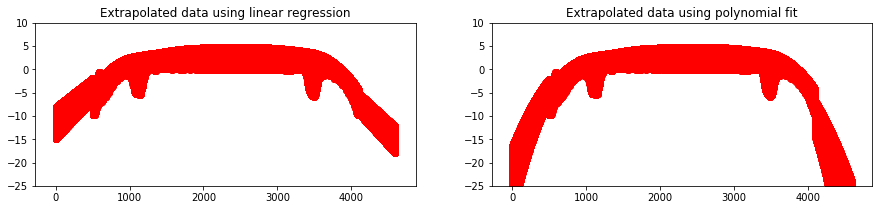

In [86]:
compare([new_data_lr,new_data_poly],["Extrapolated data using linear regression","Extrapolated data using polynomial fit"])